In [12]:
import math
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
!pip install --upgrade pandas_datareader

In [16]:
df = yf.download('AAPL', start='2012-01-01', end='2024-06-01')

[*********************100%%**********************]  1 of 1 completed


In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416982,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483712,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622307,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754256,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734030,394024400


In [19]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000
2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900
2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300


In [20]:
df.shape

(3123, 6)

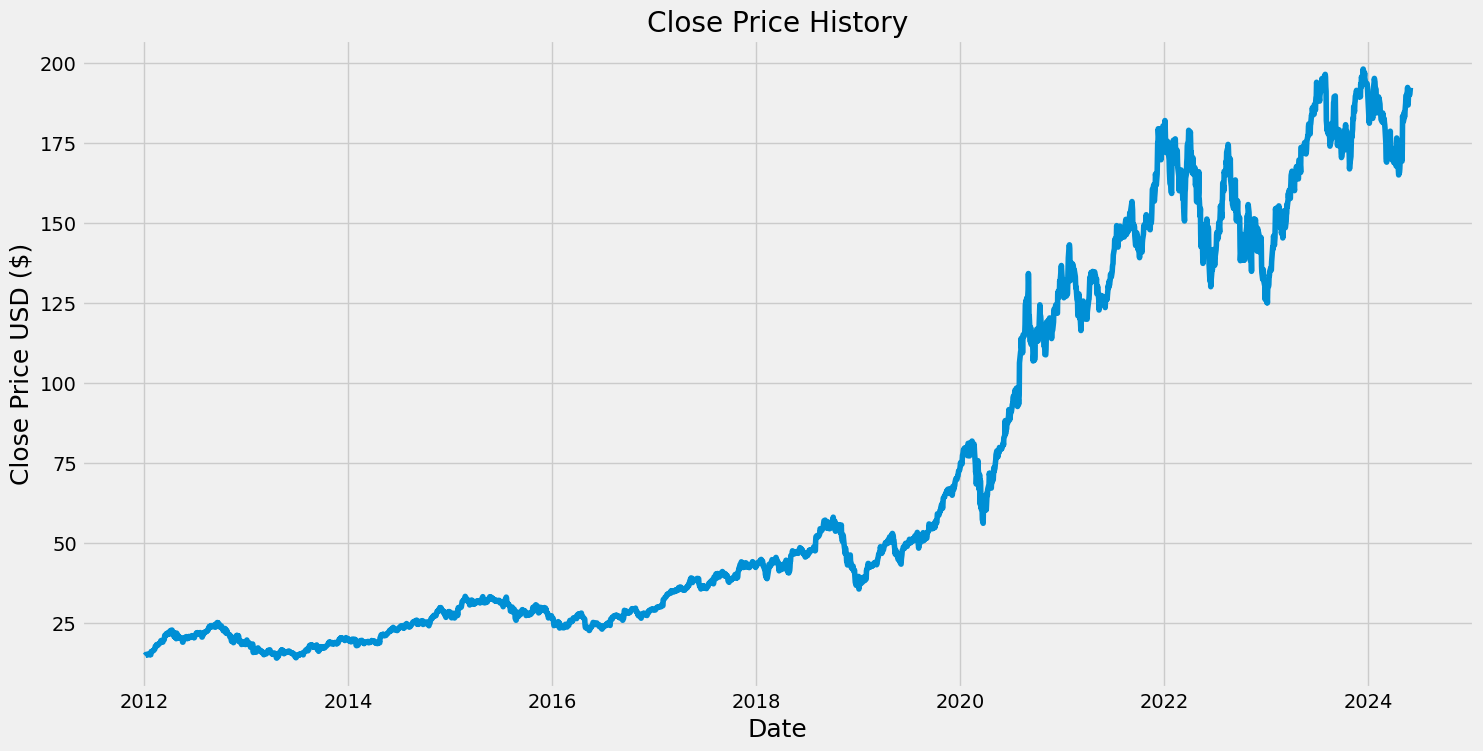

In [22]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [23]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2499

In [24]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.95753746],
       [0.96296745],
       [0.96818027]])

In [27]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [29]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
x_train.shape
print("..")
y_train.shape

..


(2439,)

In [32]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2439, 60, 1)

In [34]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [121]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2439/2439 [==============================] - 21s 8ms/step - loss: 9.9730e-05


In [122]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
model.save('AAPL_stock_price_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [124]:
test_data = scaled_data[training_data_len - 60:, :]

X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [125]:
!pip list > requirements.txt

In [126]:
x_test = np.array(X_test)
x_test.shape

(624, 60)

In [127]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(624, 60, 1)

In [128]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 0s 5ms/step


In [129]:
model.evaluate(x_test, y_test)

20/20 [==============================] - 0s 6ms/step - loss: 27845.3535


27845.353515625

In [130]:
rsme = np.sqrt(np.mean(predictions - y_test)**2)
rsme

1.3057014147440593

<ipython-input-131-858541529963>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


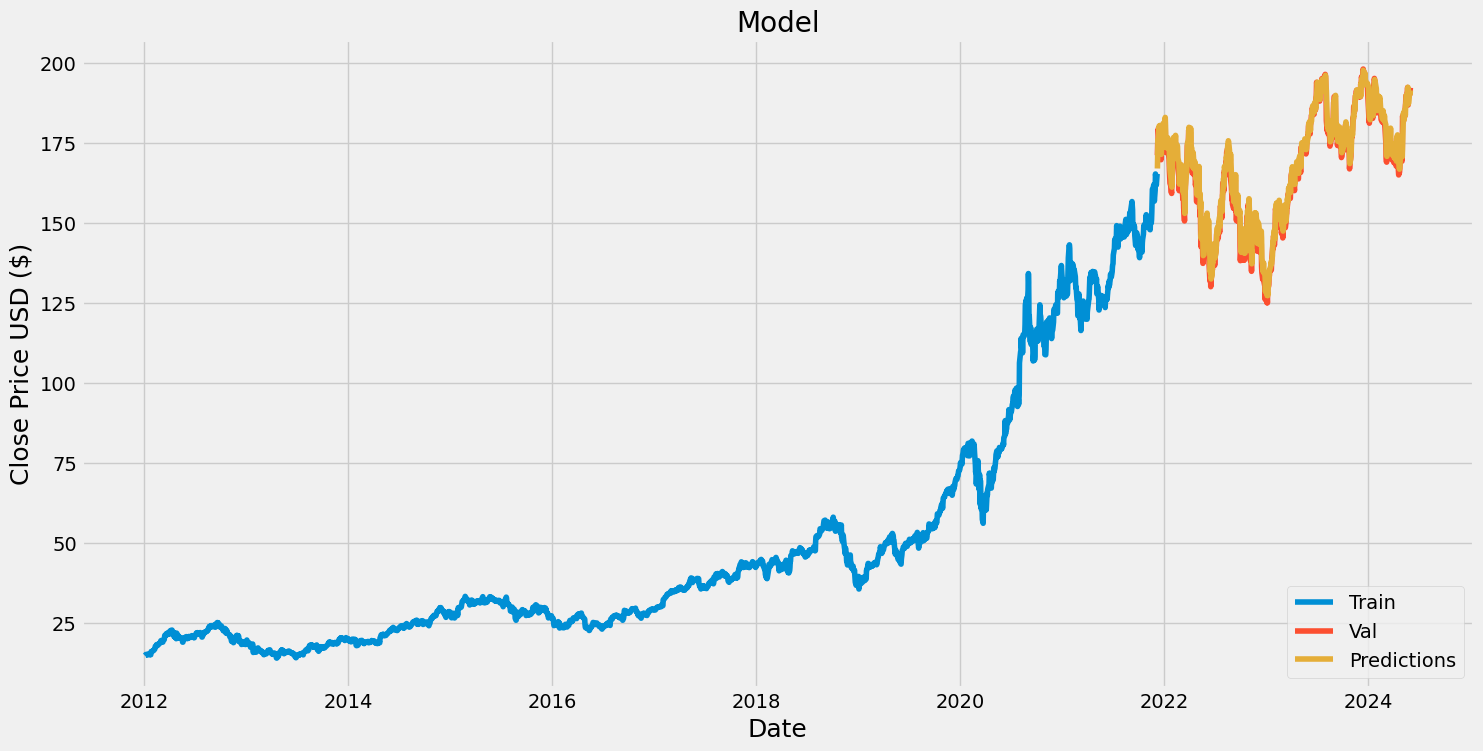

In [131]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [132]:
valid

,Close,Predictions
Date,,
2021-12-07,171.179993,167.011337
2021-12-08,175.080002,172.570267
2021-12-09,174.559998,176.004181
2021-12-10,179.449997,175.338730
2021-12-13,175.740005,180.266174
...,...,...
2024-05-24,189.979996,187.226807
2024-05-28,189.990005,190.507004
2024-05-29,190.289993,190.306625


In [133]:
apple_quote = yf.download('AAPL', start='2012-01-01', end='2024-05-31')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
new_df.shape
new_df

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2024-05-23,186.880005
2024-05-24,189.979996
2024-05-28,189.990005


In [134]:
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test.shape

(1, 60, 1)

In [135]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(1, 60, 1)

In [136]:
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 30ms/step
[[191.43932]]


In [137]:
apple_quote2 = yf.download('AAPL', start='2024-05-31', end='2024-06-01')
print(apple_quote2['Close'].tail())

[*********************100%%**********************]  1 of 1 completed

Date
2024-05-31    192.25
Name: Close, dtype: float64


In [149]:
percent = (float(pred_price)/float(apple_quote2['Close'].tail()[0]))*100
print(percent)
type(percent)

99.57831770917994


<ipython-input-149-b6c42f4ada33>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  percent = (float(pred_price)/float(apple_quote2['Close'].tail()[0]))*100


float

In [153]:
print("Prediction is correct by "+ str(percent)+" %")

Prediction is correct by 99.57831770917994 %
